In [1]:
!pip install scikeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 52.6 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.22.0 requires google-cloud-bigquery[bqstorage,pandas]>=3.10.0, but you have google-cloud-bigquery 2.34.4 which is incompatible.
bigframes 0.22.0 requires google-cloud-storage>=2.0.0, but you have google-cloud-storage 1.44.0 which is incompatible.
bigframes 0.22.0 requires pandas<2.1.4,>=1.5.0, but you have pandas 2.2.2 which is incompatible.
dataproc-jupyter-plugin 0.1.79 requires pydantic~=1.10.0, but you have pydantic 2.8.2 which is incompatible.
spaghetti 1.7.6 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible

In [4]:
# IMPORT NECESSARY LIBRARIES
import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from keras import backend as K
from tensorflow.keras.models import Sequential, load_model
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import confusion_matrix
# from sklearn.metrics import plot_roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.datasets import make_classification
from sklearn.inspection import permutation_importance
import IPython.display as ipd  # To play sound in the notebook
import os # interface with underlying OS that python is running on
import sys
import soundfile as sf
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization, Dense, LSTM
from sklearn.model_selection import GridSearchCV
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier, KerasRegressor
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
seed=7
np.random.seed(seed)
from matplotlib.pyplot import specgram
import glob
import IPython.display as ipd  # To play sound in the notebook
import pickle
# ignore warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [5]:
data_set = "/kaggle/input/urdu-emotion-dataset/"
# Run one example
dir_list = os.listdir(data_set)
dir_list[-8:]

['Angry', 'Neutral', 'Sad', 'Happy']

In [6]:
# Initialize a list to store rows of the DataFrame
data = []

# Loop through each directory and each file within the directory
for file_name in dir_list:
    dir_path = os.path.join(data_set, file_name)
    sub_dir = os.listdir(dir_path)
    for dire in sub_dir:
        file_path = os.path.join(dir_path, dire)
        emotion = file_name
        data.append([emotion, file_path])

# Create a DataFrame from the data list
df = pd.DataFrame(data, columns=['emotion', 'path'])

In [7]:
df.head(5)

,emotion,path
0,Angry,/kaggle/input/urdu-emotion-dataset/Angry/SM4_F...
1,Angry,/kaggle/input/urdu-emotion-dataset/Angry/SM4_F...
2,Angry,/kaggle/input/urdu-emotion-dataset/Angry/SM4_F...
3,Angry,/kaggle/input/urdu-emotion-dataset/Angry/SM4_F...
4,Angry,/kaggle/input/urdu-emotion-dataset/Angry/SM1_F...


In [8]:
ref = df
ref.head(10)

,emotion,path
0,Angry,/kaggle/input/urdu-emotion-dataset/Angry/SM4_F...
1,Angry,/kaggle/input/urdu-emotion-dataset/Angry/SM4_F...
2,Angry,/kaggle/input/urdu-emotion-dataset/Angry/SM4_F...
3,Angry,/kaggle/input/urdu-emotion-dataset/Angry/SM4_F...
4,Angry,/kaggle/input/urdu-emotion-dataset/Angry/SM1_F...
5,Angry,/kaggle/input/urdu-emotion-dataset/Angry/SM2_F...
6,Angry,/kaggle/input/urdu-emotion-dataset/Angry/SM1_F...
7,Angry,/kaggle/input/urdu-emotion-dataset/Angry/SM1_F...
8,Angry,/kaggle/input/urdu-emotion-dataset/Angry/SM4_F...
9,Angry,/kaggle/input/urdu-emotion-dataset/Angry/SM4_F...


In [9]:
# ENSURE GENDER,EMOTION, AND ACTOR COLUMN VALUES ARE CORRECT
pd.set_option('display.max_colwidth', None)
df.sample(100)

,emotion,path
265,Sad,/kaggle/input/urdu-emotion-dataset/Sad/SM25_F6_S056.wav
65,Angry,/kaggle/input/urdu-emotion-dataset/Angry/SM2_F17_A039.wav
120,Neutral,/kaggle/input/urdu-emotion-dataset/Neutral/SM3_F7_N027.wav
132,Neutral,/kaggle/input/urdu-emotion-dataset/Neutral/SM5_F62_N090.wav
378,Happy,/kaggle/input/urdu-emotion-dataset/Happy/SM18_F2_H050.wav
...,...,...
288,Sad,/kaggle/input/urdu-emotion-dataset/Sad/SM23_F5_S011.wav
66,Angry,/kaggle/input/urdu-emotion-dataset/Angry/SM4_F31_A083.wav
303,Happy,/kaggle/input/urdu-emotion-dataset/Happy/SM7_F18_H090.wav
165,Neutral,/kaggle/input/urdu-emotion-dataset/Neutral/SM5_F19_N047.wav


<Axes: ylabel='count'>

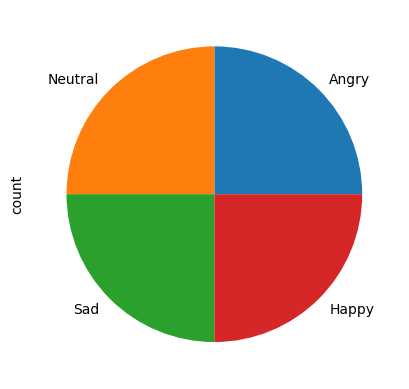

In [10]:
# LOOK AT DISTRIBUTION OF CLASSES
df.emotion.value_counts().plot(kind='pie')

In [11]:
ref=ref.groupby('emotion').head(150)
ref['emotion'].value_counts()

emotion
Angry      100
Neutral    100
Sad        100
Happy      100
Name: count, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  400 non-null    object
 1   path     400 non-null    object
dtypes: object(2)
memory usage: 6.4+ KB


In [13]:
!pip install resampy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 12.2 MB/s eta 0:00:0000:0100:01


In [14]:
import resampy
from resampy import resample
import librosa

In [15]:
# Note this takes a couple of minutes (~10 mins) as we're iterating over 4 datasets
df = pd.DataFrame(columns=['Features'])

# loop feature extraction over the entire dataset
counter=0
for index,path in enumerate(ref.path):
    X, sample_rate = librosa.load(path
                                  ,res_type='kaiser_fast'
                                  ,duration=3
                                  ,sr=44100
                                  ,offset=0.5
                                 )
    sample_rate = np.array(sample_rate)
    result = np.array([])

    # mean as the feature. Could do min and max etc as well.
    mfccs = np.mean(librosa.feature.mfcc(y=X,
                                        sr=sample_rate,
                                        n_mfcc=20),
                    axis=0)
    result=np.hstack((result, mfccs)) # stacking horizontally

    #get the mel-scaled spectrogram (ransform both the y-axis (frequency) to log scale, and the “color” axis (amplitude) to Decibels, which is kinda the log scale of amplitudes.)
    spectrogram = librosa.feature.melspectrogram(y=X, sr=sample_rate, n_mels=128,fmax=8000)
    db_spec = librosa.power_to_db(spectrogram)
    #temporally average spectrogram
    log_spectrogram = np.mean(db_spec, axis = 0)
    result=np.hstack((result, log_spectrogram)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(X))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=X).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    df.loc[counter] = [result]
    counter=counter+1


# Check a few records to make sure its processed successfully
print(len(df))
df.head()

400


,Features
0,"[-7.9141740798950195, -7.1730499267578125, -8.831738471984863, -9.698480606079102, -11.167156219482422, -12.8041410446167, -11.758394241333008, -10.880735397338867, -10.268684387207031, -10.988569259643555, -12.360021591186523, -12.844146728515625, -11.991177558898926, -12.26117992401123, -12.385797500610352, -12.188736915588379, -11.376011848449707, -11.054590225219727, -10.004932403564453, -8.284907341003418, -7.951886177062988, -8.21696949005127, -5.92224645614624, -4.583605766296387, -4.868288993835449, -5.4996185302734375, -6.791162967681885, -7.9832305908203125, -6.531841278076172, -6.682071685791016, -7.39763879776001, -9.127847671508789, -8.963422775268555, -8.534116744995117, -9.133992195129395, -9.462125778198242, -9.032692909240723, -8.499103546142578, -8.120851516723633, -8.466928482055664, -9.001996994018555, -9.244546890258789, -8.042257308959961, -8.204106330871582, -7.9000563621521, -7.701778411865234, -7.019909858703613, -6.51598596572876, -5.904845237731934, -5.82354211807251, -5.714250564575195, -5.781482219696045, -5.434837818145752, -6.079769134521484, -5.704610347747803, -5.251967430114746, -5.906155109405518, -4.873394966125488, -4.8368072509765625, -5.004097938537598, -5.225417137145996, -6.718519687652588, -8.213598251342773, -7.00876522064209, -6.992466926574707, -8.433837890625, -8.665087699890137, -8.188502311706543, -8.399746894836426, -8.073088645935059, -7.932435512542725, -8.658246040344238, -9.233434677124023, -10.300424575805664, -9.579477310180664, -9.30312728881836, -8.86490535736084, -9.277668952941895, -10.396635055541992, -10.55225944519043, -9.89876651763916, -8.7123384475708, -8.707366943359375, -7.978725433349609, -7.126745700836182, -8.14804458618164, -7.327592372894287, -6.895623683929443, -7.181118965148926, -6.975138187408447, -6.420940399169922, -5.993073463439941, -5.392038345336914, -5.9394354820251465, -5.719744682312012, -5.92087459564209, -5.963681221008301, -6.270931720733643, -6.773993492126465, -6.380055904388428, ...]"
1,"[-7.526238918304443, -8.116785049438477, -8.6719970703125, -7.9592132568359375, -7.683826446533203, -6.702397346496582, -6.046621322631836, -7.319840431213379, -7.967937469482422, -7.917905330657959, -6.897561073303223, -6.88949728012085, -6.988311767578125, -7.78396463394165, -9.60136890411377, -9.398530960083008, -9.147098541259766, -9.400734901428223, -8.177409172058105, -7.003780364990234, -7.388818264007568, -8.208036422729492, -7.623274326324463, -8.02332592010498, -8.069902420043945, -8.655974388122559, -7.922524452209473, -7.3970746994018555, -8.402175903320312, -9.201356887817383, -8.988568305969238, -8.638848304748535, -8.432034492492676, -8.49897575378418, -7.694897651672363, -8.79722785949707, -9.557576179504395, -9.356321334838867, -8.74565315246582, -8.625144004821777, -8.398931503295898, -9.271726608276367, -10.190221786499023, -10.106988906860352, -9.706439971923828, -9.554094314575195, -9.1278657913208, -8.465973854064941, -7.706282615661621, -6.973477363586426, -7.76568078994751, -8.765873908996582, -8.903735160827637, -7.962157249450684, -6.939296722412109, -7.260882377624512, -6.716654300689697, -7.195381164550781, -7.191902160644531, -7.048429012298584, -7.56674337387085, -7.7054572105407715, -7.482536315917969, -6.693415641784668, -6.3723626136779785, -6.32371711730957, -6.037186145782471, -5.32332181930542, -6.3409905433654785, -7.567381381988525, -8.104436874389648, -8.949051856994629, -8.641532897949219, -7.61797571182251, -6.210280418395996, -6.8269243240356445, -7.507002830505371, -6.679868221282959, -6.95587682723999, -6.98855447769165, -7.956212043762207, -8.508430480957031, -8.785947799682617, -8.918204307556152, -8.989809036254883, -8.634801864624023, -7.5099310874938965, -5.836646556854248, -5.01174259185791, -6.124855995178223, -7.109148979187012, -9.094834327697754, -10.334924697875977, -9.931379318237305, -9.150775909423828, -8.359551429748535, -8.14796257019043, -7.400689601898193, -7.789084434509277, -8.9

In [16]:
# Now extract the mean bands to its own feature columns
df = pd.concat([ref,pd.DataFrame(df['Features'].values.tolist())],axis=1)
df[:5]

,emotion,path,0,1,2,3,4,5,6,7,...,435,436,437,438,439,440,441,442,443,444
0,Angry,/kaggle/input/urdu-emotion-dataset/Angry/SM4_F9_A061.wav,-7.914174,-7.173050,-8.831738,-9.698481,-11.167156,-12.804141,-11.758394,-10.880735,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Angry,/kaggle/input/urdu-emotion-dataset/Angry/SM4_F42_A094.wav,-7.526239,-8.116785,-8.671997,-7.959213,-7.683826,-6.702397,-6.046621,-7.319840,...,0.483215,0.460204,0.342524,0.330969,0.376276,0.387296,0.449634,0.511591,0.569593,0.082852
2,Angry,/kaggle/input/urdu-emotion-dataset/Angry/SM4_F41_A093.wav,-6.845568,-6.862447,-9.532329,-9.187460,-8.110076,-7.768838,-7.051630,-7.683487,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Angry,/kaggle/input/urdu-emotion-dataset/Angry/SM4_F38_A090.wav,-9.866832,-8.090326,-8.124726,-7.491429,-7.262040,-5.272599,-4.520436,-5.128489,...,0.529246,0.531156,0.409443,0.420446,0.470315,0.570016,0.654977,0.628096,0.558717,0.103891
4,Angry,/kaggle/input/urdu-emotion-dataset/Angry/SM1_F18_A018.wav,-1.156970,-1.535067,-3.025381,-4.461202,-5.126981,-5.086122,-5.682137,-6.996896,...,0.571177,0.481910,0.449796,0.421250,0.505196,0.540162,0.472325,0.512333,0.532387,0.103905


In [17]:
# replace NA with 0
df=df.fillna(0)
print(df.shape)
df[:5]

(400, 447)


,emotion,path,0,1,2,3,4,5,6,7,...,435,436,437,438,439,440,441,442,443,444
0,Angry,/kaggle/input/urdu-emotion-dataset/Angry/SM4_F9_A061.wav,-7.914174,-7.173050,-8.831738,-9.698481,-11.167156,-12.804141,-11.758394,-10.880735,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Angry,/kaggle/input/urdu-emotion-dataset/Angry/SM4_F42_A094.wav,-7.526239,-8.116785,-8.671997,-7.959213,-7.683826,-6.702397,-6.046621,-7.319840,...,0.483215,0.460204,0.342524,0.330969,0.376276,0.387296,0.449634,0.511591,0.569593,0.082852
2,Angry,/kaggle/input/urdu-emotion-dataset/Angry/SM4_F41_A093.wav,-6.845568,-6.862447,-9.532329,-9.187460,-8.110076,-7.768838,-7.051630,-7.683487,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Angry,/kaggle/input/urdu-emotion-dataset/Angry/SM4_F38_A090.wav,-9.866832,-8.090326,-8.124726,-7.491429,-7.262040,-5.272599,-4.520436,-5.128489,...,0.529246,0.531156,0.409443,0.420446,0.470315,0.570016,0.654977,0.628096,0.558717,0.103891
4,Angry,/kaggle/input/urdu-emotion-dataset/Angry/SM1_F18_A018.wav,-1.156970,-1.535067,-3.025381,-4.461202,-5.126981,-5.086122,-5.682137,-6.996896,...,0.571177,0.481910,0.449796,0.421250,0.505196,0.540162,0.472325,0.512333,0.532387,0.103905


In [18]:
# Split between train and test
X_train, X_test, y_train, y_test = train_test_split(df.drop(['path','emotion'],axis=1)
                                                    , df.emotion
                                                    , test_size=0.20
                                                    , shuffle=True
                                                    , random_state=42
                                                   )

# Lets see how the data present itself before normalisation
X_train[150:160]

,0,1,2,3,4,5,6,7,8,9,...,435,436,437,438,439,440,441,442,443,444
115,-3.901831,-2.962370,-1.572514,-0.490366,0.038408,0.249371,-0.608654,-0.577296,0.093990,0.871033,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
234,-10.387471,-7.378389,-5.101100,-5.545276,-6.589747,-5.990426,-5.063994,-5.337545,-4.480498,-5.484257,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
237,0.565322,1.110602,0.161865,-0.708295,-1.450494,-0.327472,-0.066793,-0.318009,-0.564342,-0.379740,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
26,-2.848540,-4.473985,-8.222078,-9.585353,-9.670761,-9.112490,-7.097907,-5.585435,-5.313918,-4.321335,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
120,-16.729153,-13.929483,-13.478249,-14.745152,-14.913214,-15.804672,-14.573031,-13.505091,-14.376619,-14.682930,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
357,-5.583982,-5.483267,-6.042011,-7.858391,-8.238758,-6.972464,-8.699681,-9.057231,-10.294786,-7.920142,...,0.381340,0.407741,0.425310,0.403597,0.398015,0.326483,0.304225,0.351742,0.468170,0.071126
224,0.171423,0.978782,-1.946913,-1.737617,-0.966049,-0.995305,-0.688999,-0.384795,-0.523821,-0.068732,...,0.728896,0.711453,0.713966,0.739295,0.740645,0.758022,0.753340,0.761293,0.771558,0.098150
360,-1.756653,-2.888268,-4.745111,-4.309342,-3.988585,-3.246488,-4.021951,-5.502880,-5.116065,-5.568746,...,0.561112,0.619124,0.697356,0.709628,0.699629,0.591534,0.538786,0.548267,0.550592,0.065347
378,-2.270946,-3.795316,-5.056832,-5.423985,-5.789824,-6.235960,-5.781755,-3.936347,-5.404349,-7.018275,...,0.339500,0.366044,0.434554,0.503870,0.537533,0.431500,0.393174,0.495361,0.653265,0.110283
350,-11.119649,-10.749060,-11.604576,-11.565017,-9.766171,-10.125860,-10.763189,-10.005599,-9.640912,-11.007837,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [19]:

# NORMALIZE DATA
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train = (X_train - mean)/std
X_test = (X_test - mean)/std
# TURN DATA INTO ARRAYS FOR KERAS
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
# ONE HOT ENCODE THE TARGET
# CNN REQUIRES INPUT AND OUTPUT ARE NUMBERS
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))
print(y_test[0:10])
# RESHAPE DATA TO INCLUDE 3D TENSOR
X_train = X_train[:,:,np.newaxis]
X_test = X_test[:,:,np.newaxis]

print(X_train.shape)
print(X_test.shape)

[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]
(320, 445, 1)
(80, 445, 1)


In [20]:
lb.classes_

array(['Angry', 'Happy', 'Neutral', 'Sad'], dtype=object)

In [21]:
# ITERATE OVER ALL AUDIO FILES AND EXTRACT LOG MEL SPECTROGRAM MEAN VALUES INTO DF FOR MODELING
import pandas as pd
df_mel = pd.DataFrame(columns=['mel_spectrogram'])

counter=0

for index,path in enumerate(ref.path):
    X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=3,sr=44100,offset=0.5)

    #get the mel-scaled spectrogram (ransform both the y-axis (frequency) to log scale, and the “color” axis (amplitude) to Decibels, which is kinda the log scale of amplitudes.)
    spectrogram = librosa.feature.melspectrogram(y=X, sr=sample_rate, n_mels=128,fmax=8000)
    db_spec = librosa.power_to_db(spectrogram)
    #temporally average spectrogram
    log_spectrogram = np.mean(db_spec, axis = 0)

    # Mel-frequency cepstral coefficients (MFCCs)
#     mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
#     mfcc=np.mean(mfcc,axis=0)

    # compute chroma energy (pertains to 12 different pitch classes)
#     chroma = librosa.feature.chroma_stft(y=X, sr=sample_rate)
#     chroma = np.mean(chroma, axis = 0)

    # compute spectral contrast
#     contrast = librosa.feature.spectral_contrast(y=X, sr=sample_rate)
#     contrast = np.mean(contrast, axis= 0)

    # compute zero-crossing-rate (zcr:the zcr is the rate of sign changes along a signal i.e.m the rate at
#     which the signal changes from positive to negative or back - separation of voiced andunvoiced speech.)
#     zcr = librosa.feature.zero_crossing_rate(y=X)
#     zcr = np.mean(zcr, axis= 0)

    df_mel.loc[counter] = [log_spectrogram]
    counter=counter+1

print(len(df_mel))
df_mel.head()

400


,mel_spectrogram
0,"[-9.020744, -7.83539, -9.529644, -9.869362, -10.7151985, -11.080721, -10.541673, -10.378289, -10.130733, -12.123789, -15.497014, -18.60739, -19.282362, -20.174477, -20.715254, -21.332226, -18.461023, -15.629778, -15.412677, -14.500516, -13.2467375, -10.550086, -6.986853, -5.5638447, -6.1069517, -6.9569845, -7.606411, -8.183159, -6.9905906, -7.198696, -8.88717, -10.835296, -11.704518, -13.702147, -16.778341, -17.703451, -16.043934, -15.575493, -16.164635, -13.981638, -12.609618, -13.247727, -12.613385, -11.351447, -10.803514, -11.488602, -10.976498, -9.50895, -7.3641405, -7.2919197, -9.142904, -9.431526, -8.996694, -9.459412, -10.1061, -10.707815, -11.642703, -12.622055, -15.62824, -19.798958, -24.359243, -26.588158, -27.312042, -24.869131, -23.71617, -24.99009, -25.715462, -26.552994, -27.161375, -28.082594, -29.086319, -31.093264, -31.434877, -31.73971, -33.19814, -34.85994, -37.249355, -40.128536, -41.967026, -42.440216, -38.009422, -23.654377, -17.128193, -14.208008, -11.669256, -11.3169365, -10.021627, -10.108805, -11.184172, -10.883817, -8.658894, -7.10577, -5.4436517, -4.3692555, -2.930646, -2.1588314, -2.4982748, -3.2187374, -4.121707, -6.0813785, ...]"
1,"[-28.671566, -28.503977, -28.817846, -26.88469, -24.676767, -22.663473, -22.090977, -22.043879, -21.513622, -22.084429, -22.84763, -23.225908, -24.722275, -27.003698, -30.627886, -34.37424, -35.025497, -29.867493, -23.700457, -18.403915, -17.753008, -18.413958, -19.24972, -23.619501, -27.78074, -30.759354, -27.770617, -21.265512, -19.567163, -20.933416, -21.626451, -22.595648, -24.82841, -26.532797, -26.892763, -25.4131, -23.591534, -23.460775, -23.275738, -22.765173, -23.314323, -23.989704, -25.30581, -28.992207, -30.122889, -29.42698, -26.865917, -19.121815, -15.814446, -15.843446, -15.953945, -16.71873, -15.65247, -14.572711, -12.086637, -10.812736, -10.611827, -11.016104, -13.70815, -17.815918, -20.713017, -21.495796, -17.645527, -13.202668, -10.977361, -11.8840065, -12.783412, -14.650339, -19.164686, -23.47932, -26.676485, -24.752853, -19.689096, -17.399206, -15.136786, -13.39249, -13.715983, -14.209164, -14.642583, -17.40224, -22.30188, -26.823185, -28.219336, -23.509851, -18.182621, -14.885039, -12.555468, -11.071451, -11.426533, -13.379314, -15.650403, -17.873402, -20.539421, -21.61692, -20.179539, -18.763735, -18.112839, -17.805824, -17.262178, -17.016115, ...]"
2,"[-16.591997, -17.688711, -21.460049, -21.262575, -21.478914, -21.974615, -23.11493, -24.302847, -22.667822, -18.332542, -15.139501, -13.210295, -12.39345, -12.611075, -13.695195, -14.108515, -13.966418, -14.2220955, -11.115799, -9.695874, -11.628267, -11.402539, -11.830749, -13.793376, -18.158728, -22.809937, -26.001802, -28.827389, -29.945726, -30.726152, -33.2598, -35.21441, -34.683544, -33.549095, -31.40223, -29.533028, -28.980442, -29.117142, -29.808895, -29.705976, -28.355522, -29.382738, -33.39496, -35.8623, -37.785103, -38.251278, -38.951904, -38.57067, -39.123764, -37.960194, -34.89849, -29.674934, -26.021757, -24.765509, -23.623497, -23.28336, -23.411724, -24.95208, -25.53253, -25.83476, -26.341198, -22.3263, -18.959131, -17.864527, -17.211008, -17.014988, -17.420631, -17.705662, -19.434513, -22.566624, -24.94543, -25.2595, -21.735027, -20.453974, -20.350813, -19.739235, -19.413595, -18.348774, -17.175163, -17.540718, -18.70541, -18.975874, -17.081598, -14.854288, -14.230536, -13.340802, -13.519518, -14.224092, -15.332516, -15.41404, -14.521265, -13.8104105, -14.055409, -14.24945, -17.042675, -22.803812, -26.378983, -28.539993, -31.202513, -29.514618, ...]"
3,"[-30.31604, -27.953176, -27.96731, -28.430063, -24.865288, -17.979614, -15.081647, -14.910265, -15.076652, -15.815165, -14.472536, -13.216216, -13.352681, -13.947223, -13.395265, -13.326268, -15.7027445, -19.393219, -22.586868, -23.975166, -24.83956, -23.870478, -22.276762, -22.771156, -25.13187, -29.19262, -30.00584, -27.64023, -24.941181, -23.33616, -22.045128, -20.249676, -18.567276, -17.256252, -17.615543, -19

In [22]:
# Now extract the mean bands to its own feature columns
df = pd.concat([ref,pd.DataFrame(df_mel['mel_spectrogram'].values.tolist())],axis=1)
df[:5]

,emotion,path,0,1,2,3,4,5,6,7,...,206,207,208,209,210,211,212,213,214,215
0,Angry,/kaggle/input/urdu-emotion-dataset/Angry/SM4_F9_A061.wav,-9.020744,-7.835390,-9.529644,-9.869362,-10.715199,-11.080721,-10.541673,-10.378289,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Angry,/kaggle/input/urdu-emotion-dataset/Angry/SM4_F42_A094.wav,-28.671566,-28.503977,-28.817846,-26.884689,-24.676767,-22.663473,-22.090977,-22.043879,...,-26.751537,-28.599749,-29.230864,-30.838737,-32.560852,-32.912399,-32.080685,-28.647306,-26.241663,-20.061708
2,Angry,/kaggle/input/urdu-emotion-dataset/Angry/SM4_F41_A093.wav,-16.591997,-17.688711,-21.460049,-21.262575,-21.478914,-21.974615,-23.114929,-24.302847,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Angry,/kaggle/input/urdu-emotion-dataset/Angry/SM4_F38_A090.wav,-30.316040,-27.953176,-27.967310,-28.430063,-24.865288,-17.979614,-15.081647,-14.910265,...,-19.022301,-17.920713,-19.825674,-24.921543,-27.885916,-25.517654,-21.674612,-20.245995,-20.573303,-16.953020
4,Angry,/kaggle/input/urdu-emotion-dataset/Angry/SM1_F18_A018.wav,-6.974143,-7.312475,-9.842043,-13.083216,-18.550303,-24.609632,-25.560863,-24.961235,...,-20.991560,-14.103132,-9.478111,-8.027641,-8.157736,-9.460633,-10.434313,-11.285854,-15.692192,-20.419704


In [23]:
# Split between train and test
X_train, X_test, y_train, y_test = train_test_split(df.drop(['path','emotion'],axis=1)
                                                    , df.emotion
                                                    , test_size=0.20
                                                    , shuffle=True
                                                    , random_state=42
                                                   )

# Lets see how the data present itself before normalisation
X_train[150:160]

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
115,-14.192441,-11.031940,-10.086428,-6.286234,-6.624150,-6.883415,-6.735688,-4.428106,-4.139610,-6.710186,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
234,-31.655674,-29.098888,-28.932884,-28.453142,-28.524914,-28.639648,-28.427675,-28.430634,-27.735477,-28.082472,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
237,-7.581854,-5.419762,-5.511679,-5.427300,-5.286733,-5.221011,-5.254390,-5.432120,-5.874578,-6.079962,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,-23.301329,-21.665579,-23.055132,-24.323544,-25.351151,-25.797348,-24.549038,-17.526098,-10.595805,-6.975456,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,-34.893105,-32.578323,-32.970524,-32.778084,-32.114326,-32.331295,-31.995613,-31.597300,-31.225735,-31.547812,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
357,-13.460514,-12.928066,-14.707947,-15.271993,-14.771435,-15.382431,-20.496876,-27.662321,-28.567448,-24.706568,...,-13.327239,-14.877136,-18.257601,-20.920374,-21.930672,-18.436937,-13.131405,-10.304853,-10.357418,-9.510974
224,-20.847956,-20.305489,-20.697994,-20.816736,-22.018778,-23.198988,-23.411283,-23.206982,-23.587711,-23.164289,...,-19.347685,-18.599781,-19.256245,-19.214525,-18.515190,-17.740931,-17.781952,-18.396992,-18.396584,-16.633051
360,-12.535824,-11.438989,-11.544706,-11.648856,-11.799793,-13.352612,-15.185257,-16.549845,-17.849920,-20.278446,...,-29.210821,-29.538467,-29.146126,-28.749388,-25.975693,-17.931808,-15.836427,-20.480850,-26.946194,-25.344114
378,-21.740620,-18.548609,-16.591564,-18.158197,-19.087559,-19.644491,-22.401819,-21.168314,-18.332355,-16.694334,...,-14.615228,-15.426363,-16.550591,-17.761593,-17.046194,-13.754274,-12.299907,-12.747292,-12.852365,-10.193930
350,-26.267120,-28.437216,-32.935673,-33.187672,-32.538734,-28.320076,-25.087818,-25.662159,-28.392246,-34.218140,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:

# NORMALIZE DATA
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train = (X_train - mean)/std
X_test = (X_test - mean)/std
# TURN DATA INTO ARRAYS FOR KERAS
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
# ONE HOT ENCODE THE TARGET
# CNN REQUIRES INPUT AND OUTPUT ARE NUMBERS
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))
print(y_test[0:10])
# RESHAPE DATA TO INCLUDE 3D TENSOR
X_train = X_train[:,:,np.newaxis]
X_test = X_test[:,:,np.newaxis]

print(X_train.shape)
print(X_test.shape)

[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]
(320, 216, 1)
(80, 216, 1)


In [25]:
data_path = pd.concat([df], axis = 0)
# data_path.to_csv(csv_path,index=False)
data_path.head()

,emotion,path,0,1,2,3,4,5,6,7,...,206,207,208,209,210,211,212,213,214,215
0,Angry,/kaggle/input/urdu-emotion-dataset/Angry/SM4_F9_A061.wav,-9.020744,-7.835390,-9.529644,-9.869362,-10.715199,-11.080721,-10.541673,-10.378289,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Angry,/kaggle/input/urdu-emotion-dataset/Angry/SM4_F42_A094.wav,-28.671566,-28.503977,-28.817846,-26.884689,-24.676767,-22.663473,-22.090977,-22.043879,...,-26.751537,-28.599749,-29.230864,-30.838737,-32.560852,-32.912399,-32.080685,-28.647306,-26.241663,-20.061708
2,Angry,/kaggle/input/urdu-emotion-dataset/Angry/SM4_F41_A093.wav,-16.591997,-17.688711,-21.460049,-21.262575,-21.478914,-21.974615,-23.114929,-24.302847,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Angry,/kaggle/input/urdu-emotion-dataset/Angry/SM4_F38_A090.wav,-30.316040,-27.953176,-27.967310,-28.430063,-24.865288,-17.979614,-15.081647,-14.910265,...,-19.022301,-17.920713,-19.825674,-24.921543,-27.885916,-25.517654,-21.674612,-20.245995,-20.573303,-16.953020
4,Angry,/kaggle/input/urdu-emotion-dataset/Angry/SM1_F18_A018.wav,-6.974143,-7.312475,-9.842043,-13.083216,-18.550303,-24.609632,-25.560863,-24.961235,...,-20.991560,-14.103132,-9.478111,-8.027641,-8.157736,-9.460633,-10.434313,-11.285854,-15.692192,-20.419704


In [26]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

In [27]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(y=data, rate=rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(y=data,sr=sampling_rate,n_steps=pitch_factor)

# taking any example and checking for techniques.
path = np.array(data_path.path)[1]
data, sample_rate = librosa.load(path)

In [28]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate,n_mfcc=13).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally

    return result

In [29]:
def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    result = np.array([])

    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)

    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically

    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically

    return result

In [30]:
X, Y = [], []
for path, emotion in zip(df.path, df.emotion):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

In [31]:
len(X), len(Y), data_path.path.shape

(1200, 1200, (400,))

In [32]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,146,147,148,149,150,151,152,153,154,labels
0,0.093790,0.581303,0.619325,0.622041,0.541552,0.601232,0.617853,0.590321,0.446917,0.510025,...,9.837810e-06,9.850132e-06,9.503599e-06,9.450769e-06,9.408495e-06,9.667770e-06,1.036811e-05,1.055272e-05,8.021815e-06,Angry
1,0.108703,0.614913,0.658106,0.665151,0.584438,0.638549,0.631630,0.588944,0.449353,0.507409,...,8.733062e-04,8.980142e-04,9.011230e-04,8.266143e-04,8.897788e-04,9.157531e-04,8.939025e-04,8.930793e-04,9.521125e-04,Angry
2,0.089054,0.575346,0.557720,0.594776,0.530000,0.543233,0.601862,0.630189,0.469262,0.418446,...,1.794806e-06,1.758550e-06,1.781669e-06,1.892901e-06,1.220359e-06,1.277260e-06,1.141313e-06,6.638353e-07,1.289705e-07,Angry
3,0.070777,0.632854,0.498608,0.463171,0.466893,0.376119,0.288115,0.329425,0.341014,0.375188,...,4.484346e-07,4.415274e-07,4.388770e-07,4.402649e-07,4.515404e-07,4.754355e-07,5.229218e-07,5.593462e-07,4.344168e-07,Angry
4,0.150034,0.693664,0.678083,0.555131,0.545732,0.529199,0.422939,0.344660,0.379467,0.379843,...,8.085313e-03,7.812490e-03,7.994245e-03,8.202346e-03,8.741613e-03,8.583623e-03,8.445629e-03,8.414603e-03,8.139463e-03,Angry


In [33]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

X = Features.iloc[: ,:-1].values
Y = Features['labels'].values
x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size=0.20, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

# NORMALIZE DATA
mean = np.mean(x_train, axis=0)
std = np.std(x_train, axis=0)
x_train = (x_train - mean)/std
x_test = (x_test - mean)/std

# TURN DATA INTO ARRAYS FOR KERAS
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
# ONE HOT ENCODE THE TARGET
# CNN REQUIRES INPUT AND OUTPUT ARE NUMBERS
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))
print(y_test[0:10])
# RESHAPE DATA TO INCLUDE 3D TENSOR
x_train = x_train[:,:,np.newaxis]
x_test = x_test[:,:,np.newaxis]

print(x_train.shape)
print(x_test.shape)

# Define the K-fold Cross Validator
kfold = KFold(n_splits=2, shuffle=True)
acc_per_fold = []
loss_per_fold = []
inputs = np.concatenate((x_train, x_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)
inputs.shape
targets.shape

[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]
(960, 155, 1)
(240, 155, 1)


(1200, 4)

In [34]:
lb.classes_

array(['Angry', 'Happy', 'Neutral', 'Sad'], dtype=object)

In [35]:
#Accuarte class labels

In [36]:
data_path = pd.concat([df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head(50)

,emotion,path,0,1,2,3,4,5,6,7,...,206,207,208,209,210,211,212,213,214,215
0,Angry,/kaggle/input/urdu-emotion-dataset/Angry/SM4_F9_A061.wav,-9.020744,-7.835390,-9.529644,-9.869362,-10.715199,-11.080721,-10.541673,-10.378289,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Angry,/kaggle/input/urdu-emotion-dataset/Angry/SM4_F42_A094.wav,-28.671566,-28.503977,-28.817846,-26.884689,-24.676767,-22.663473,-22.090977,-22.043879,...,-26.751537,-28.599749,-29.230864,-30.838737,-32.560852,-32.912399,-32.080685,-28.647306,-26.241663,-20.061708
2,Angry,/kaggle/input/urdu-emotion-dataset/Angry/SM4_F41_A093.wav,-16.591997,-17.688711,-21.460049,-21.262575,-21.478914,-21.974615,-23.114929,-24.302847,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Angry,/kaggle/input/urdu-emotion-dataset/Angry/SM4_F38_A090.wav,-30.316040,-27.953176,-27.967310,-28.430063,-24.865288,-17.979614,-15.081647,-14.910265,...,-19.022301,-17.920713,-19.825674,-24.921543,-27.885916,-25.517654,-21.674612,-20.245995,-20.573303,-16.953020
4,Angry,/kaggle/input/urdu-emotion-dataset/Angry/SM1_F18_A018.wav,-6.974143,-7.312475,-9.842043,-13.083216,-18.550303,-24.609632,-25.560863,-24.961235,...,-20.991560,-14.103132,-9.478111,-8.027641,-8.157736,-9.460633,-10.434313,-11.285854,-15.692192,-20.419704
5,Angry,/kaggle/input/urdu-emotion-dataset/Angry/SM2_F11_A033.wav,-43.988560,-41.824780,-42.086678,-41.980888,-41.457569,-40.776184,-40.721977,-40.354038,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Angry,/kaggle/input/urdu-emotion-dataset/Angry/SM1_F2_A02.wav,-21.518820,-23.177116,-25.913927,-25.809210,-25.655491,-17.923452,-10.081818,-7.844447,...,-6.240075,-7.695313,-10.264752,-16.548771,-19.582277,-19.061937,-17.490614,-14.498013,-9.542538,-5.298159
7,Angry,/kaggle/input/urdu-emotion-dataset/Angry/SM1_F8_A08.wav,-11.184072,-12.273617,-14.308197,-13.774105,-12.959963,-12.477627,-14.306837,-18.060162,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Angry,/kaggle/input/urdu-emotion-dataset/Angry/SM4_F4_A056.wav,-15.038927,-18.791321,-27.603121,-30.356264,-30.893171,-25.947149,-19.679007,-16.457134,...,-26.432386,-27.407558,-22.457676,-17.257002,-14.646555,-13.672221,-10.616941,-8.580045,-8.443327,-5.966531
9,Angry,/kaggle/input/urdu-emotion-dataset/Angry/SM4_F45_A097.wav,-17.169643,-15.315155,-16.620922,-15.843429,-13.893906,-11.851766,-11.039694,-11.798187,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

In [38]:
def noise(data):
    noise_amp = 0.015*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(y=data,rate=rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(y=data,sr=sampling_rate,n_steps=pitch_factor)

def pitch2(data, sampling_rate, pitch_factor=0.6):
    return librosa.effects.pitch_shift(y=data,sr=sampling_rate,n_steps=pitch_factor)

# taking any example and checking for techniques.
path = np.array(data_path.path)[1]
data, sample_rate = librosa.load(path)

In [39]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate,n_mfcc=13).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally

    return result

In [40]:
def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    result = np.array([])

    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)

    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically

    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically

    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch2(new_data, sample_rate)
    res4 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res4)) # stacking vertically

    return result

In [41]:
X, Y = [], []
for path, emotion in zip(df.path, df.emotion):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

In [42]:
len(X), len(Y), data_path.path.shape

(1600, 1600, (400,))

In [43]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,146,147,148,149,150,151,152,153,154,labels
0,0.093790,0.581303,0.619325,0.622041,0.541552,0.601232,0.617853,0.590321,0.446917,0.510025,...,9.837810e-06,9.850132e-06,9.503599e-06,9.450769e-06,9.408495e-06,9.667770e-06,1.036811e-05,1.055272e-05,8.021815e-06,Angry
1,0.123399,0.610189,0.658024,0.670264,0.591347,0.645043,0.635454,0.589509,0.455693,0.510515,...,1.657728e-03,1.767032e-03,1.741941e-03,1.703158e-03,1.622747e-03,1.728691e-03,1.848609e-03,1.776194e-03,1.788681e-03,Angry
2,0.089054,0.575346,0.557720,0.594776,0.530000,0.543233,0.601862,0.630189,0.469262,0.418446,...,1.794806e-06,1.758550e-06,1.781669e-06,1.892901e-06,1.220359e-06,1.277260e-06,1.141313e-06,6.638353e-07,1.289705e-07,Angry
3,0.089645,0.546480,0.571158,0.592363,0.493769,0.569918,0.578169,0.595012,0.440651,0.485099,...,3.337699e-06,3.044613e-06,3.354458e-06,3.519851e-06,3.088692e-06,2.980324e-06,3.348071e-06,2.986935e-06,1.930987e-06,Angry
4,0.070777,0.632854,0.498608,0.463171,0.466893,0.376119,0.288115,0.329425,0.341014,0.375188,...,4.484346e-07,4.415274e-07,4.388770e-07,4.402649e-07,4.515404e-07,4.754355e-07,5.229218e-07,5.593462e-07,4.344168e-07,Angry


In [44]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

X = Features.iloc[: ,:-1].values
Y = Features['labels'].values
x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size=0.20, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

# NORMALIZE DATA
mean = np.mean(x_train, axis=0)
std = np.std(x_train, axis=0)
x_train = (x_train - mean)/std
x_test = (x_test - mean)/std

# TURN DATA INTO ARRAYS FOR KERAS
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
# ONE HOT ENCODE THE TARGET
# CNN REQUIRES INPUT AND OUTPUT ARE NUMBERS
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))
print(y_test[0:10])
# RESHAPE DATA TO INCLUDE 3D TENSOR
x_train = x_train[:,:,np.newaxis]
x_test = x_test[:,:,np.newaxis]

print(x_train.shape)
print(x_test.shape)

# Define the K-fold Cross Validator
kfold = KFold(n_splits=2, shuffle=True)
acc_per_fold = []
loss_per_fold = []
inputs = np.concatenate((x_train, x_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)
inputs.shape
targets.shape



[[0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]
(1280, 155, 1)
(320, 155, 1)


(1600, 4)

In [45]:
lb.classes_

array(['Angry', 'Happy', 'Neutral', 'Sad'], dtype=object)

In [46]:
import random
#########################################################################
### Model average / sum Ensemble
# Simple sum of all outputs / predictions and argmax across all classes
########
from keras.models import load_model
from sklearn.metrics import accuracy_score

model1 = load_model('/kaggle/input/german-model/german_models/model1-emo-db.weights.h5')
model2 = load_model('/kaggle/input/german-model/german_models/model2-emo-db.weights.h5')
model3 = load_model('/kaggle/input/german-model/german_models/model3-emo-db.weights.h5')

models = [model1, model2, model3]

preds = [model.predict(x_test) for model in models]
preds=np.array(preds)
summed = np.sum(preds, axis=0)

# argmax across classes
ensemble_prediction = np.argmax(summed, axis=1)

prediction1 = np.argmax(model1.predict(x_test), axis=1)
prediction2 = np.argmax(model2.predict(x_test), axis=1)
prediction3 = np.argmax(model3.predict(x_test), axis=1)

accuracy1 = accuracy_score(np.argmax(y_test, axis=1), prediction1)
accuracy2 = accuracy_score(np.argmax(y_test, axis=1), prediction2)
accuracy3 = accuracy_score(np.argmax(y_test, axis=1), prediction3)
ensemble_accuracy = accuracy_score(np.argmax(y_test, axis=1), ensemble_prediction)

print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)
print('Accuracy Score for model3 = ', accuracy3)
print('Accuracy Score for average ensemble = ', ensemble_accuracy)

########################################
#Weighted average ensemble
models = [model1, model2, model3]
preds = [model.predict(x_test) for model in models]
preds=np.array(preds)
weights = [0.4, 0.2, 0.4]

#Use tensordot to sum the products of all elements over specified axes.
weighted_preds = np.tensordot(preds, weights, axes=((0),(0)))
weighted_ensemble_prediction = np.argmax(weighted_preds, axis=1)

weighted_accuracy = accuracy_score(np.argmax(y_test, axis=1), weighted_ensemble_prediction)
print('Weighted average method')
print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)
print('Accuracy Score for model3 = ', accuracy3)
print('Accuracy Score for average ensemble = ', ensemble_accuracy)
print('Accuracy Score for weighted average ensemble = ', weighted_accuracy)

########################################
#Grid search for the best combination of w1, w2, w3 that gives maximum acuracy
models = [model1, model2, model3]
preds1 = [model.predict(x_test) for model in models]
preds1=np.array(preds1)

import pandas as pd
df = pd.DataFrame([])

for w1 in range(0, 5):
    for w2 in range(0,5):
        for w3 in range(0,5):
            wts = [w1/10.,w2/10.,w3/10.]
            wted_preds1 = np.tensordot(preds1, wts, axes=((0),(0)))
            wted_ensemble_pred = np.argmax(wted_preds1, axis=1)
            weighted_accuracy = accuracy_score(np.argmax(y_test, axis=1), wted_ensemble_pred)
            df = pd.concat([df, pd.DataFrame({'wt1':wts[0],'wt2':wts[1],
                                         'wt3':wts[2], 'acc':weighted_accuracy*100}, index=[0])], ignore_index=True)

max_acc_row = df.iloc[df['acc'].idxmax()]
print("Max accuracy of ", max_acc_row[3], " obained with w1=", max_acc_row[0],
      " w2=", max_acc_row[1], " and w3=", max_acc_row[2])




###########################################################################
### Explore metrics for the ideal weighted ensemble model.

models = [model1, model2, model3]
preds = [model.predict(x_test) for model in models]
preds=np.array(preds)
ideal_weights = [0.4, 0.1, 0.2]

#Use tensordot to sum the products of all elements over specified axes.
ideal_weighted_preds = np.tensordot(preds, ideal_weights, axes=((0),(0)))
ideal_weighted_ensemble_prediction = np.argmax(ideal_weighted_preds, axis=1)

ideal_weighted_accuracy = accuracy_score(np.argmax(y_test, axis=1), ideal_weighted_ensemble_prediction)


# from sklearn.metrics import confusion_matrix
# import seaborn as sns
# #Print confusion matrix
# cm = confusion_matrix(np.argmax(y_test, axis=1), ideal_weighted_ensemble_prediction)
# cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])

# fig, ax = plt.subplots(figsize=(12,12))
# sns.set(font_scale=1.6)
# sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)

# # CREATE CONFUSION MATRIX OF ACTUAL VS. PREDICTION -SGD-MFCC
# cm = confusion_matrix(np.argmax(y_test, axis=1), ideal_weighted_ensemble_prediction)
# plt.figure(figsize = (9,7))
# plt.rcParams['figure.dpi'] = 125
# cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])
# ax = sns.heatmap(cm, linecolor='white', cmap='Accent', linewidth=1, annot=True, fmt='')
# bottom, top = ax.get_ylim()
# ax.set_ylim(bottom + 0.6, top - 0.6)
# plt.title('Confusion Matrix', size=20)
# plt.xlabel('Predicted Classes', size=15)
# plt.ylabel('True Classes', size=15)
# plt.savefig('emo-db-model-2.png')
# plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step
Accuracy Score for model1 =  0.159375
Accuracy Score for model2 =  0.2
Accuracy Score for model3 =  0.11875
Accuracy Score for average ensemble =  0.15
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step
Weighted average method
Accuracy Score for model1 =  0.159375
Accuracy Score for model2 =  0.2
Accuracy Score for model3 =  0.11875
Accuracy Score for average ensemble =  0.15
Accuracy Score for weighted average ensemble =  0.14375
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step
Max accuracy of  25.0  obained with w1= 0.0  w2= 0.0  and w3= 0.0
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1

In [47]:
#Weighted average ensemble
models = [model1, model2, model3]
preds = [model.predict(x_test) for model in models]
preds=np.array(preds)
weights = [0.3, 0.1, 0.3]

#Use tensordot to sum the products of all elements over specified axes.
weighted_preds = np.tensordot(preds, weights, axes=((0),(0)))
weighted_ensemble_prediction = np.argmax(weighted_preds, axis=1)

weighted_accuracy = accuracy_score(np.argmax(y_test, axis=1), weighted_ensemble_prediction)
print('Weighted average method')
print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)
print('Accuracy Score for model3 = ', accuracy3)
print('Accuracy Score for average ensemble = ', ensemble_accuracy)
print('Accuracy Score for weighted average ensemble = ', weighted_accuracy)


# from sklearn.metrics import confusion_matrix
# import seaborn as sns
# #Print confusion matrix
# cm = confusion_matrix(np.argmax(y_test, axis=1), ideal_weighted_ensemble_prediction)
# cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])

# fig, ax = plt.subplots(figsize=(12,12))
# sns.set(font_scale=1.6)
# sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)

# # CREATE CONFUSION MATRIX OF ACTUAL VS. PREDICTION -SGD-MFCC
# cm = confusion_matrix(np.argmax(y_test, axis=1), ideal_weighted_ensemble_prediction)
# plt.figure(figsize = (9,7))
# plt.rcParams['figure.dpi'] = 125
# cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])
# ax = sns.heatmap(cm, linecolor='white', cmap='Accent', linewidth=1, annot=True, fmt='')
# bottom, top = ax.get_ylim()
# ax.set_ylim(bottom + 0.6, top - 0.6)
# plt.title('Confusion Matrix', size=20)
# plt.xlabel('Predicted Classes', size=15)
# plt.ylabel('True Classes', size=15)
# plt.savefig('SAVEE-EMSEMBLE.png')
# plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step
Weighted average method
Accuracy Score for model1 =  0.159375
Accuracy Score for model2 =  0.2
Accuracy Score for model3 =  0.11875
Accuracy Score for average ensemble =  0.15
Accuracy Score for weighted average ensemble =  0.14375
